In [1]:

import warnings
import logging
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.metrics import r2_score

In [2]:
import inspect
print ('inspect.getfile(os) is:', inspect.getfile(hmm))

inspect.getfile(os) is: /anaconda3/lib/python3.7/site-packages/hmmlearn/hmm.py


In [3]:
train = pd.read_csv('train.csv',nrows=100000, dtype={'acoustic_data': np.int16, 'time_to_failure': np.float32})

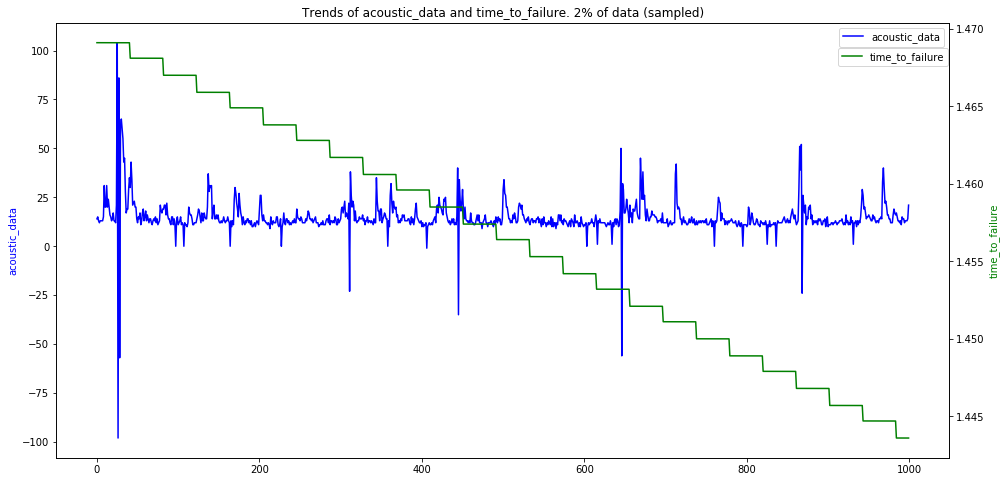

In [4]:
train_acoustic_data_small = train['acoustic_data'].values[::100]
import numpy as np
mean = np.mean(train['acoustic_data'])
for i in range(1000):
    tmp = train['acoustic_data'].values[i*100:(i+1)*100 -1]
    mmax = np.max(tmp)
    mmin = np.min(tmp)
    if np.absolute(mmax-mean) > np.absolute(mmin+mean):
        train_acoustic_data_small[i] = mmax
    else:
        train_acoustic_data_small[i] = mmin
# train_acoustic_data_small = train['acoustic_data'].values[::100]
train_time_to_failure_small = train['time_to_failure'].values[::100]
fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("Trends of acoustic_data and time_to_failure. 2% of data (sampled)")
plt.plot(train_acoustic_data_small, color='b')
ax1.set_ylabel('acoustic_data', color='b')
plt.legend(['acoustic_data'])
ax2 = ax1.twinx()
plt.plot(train_time_to_failure_small, color='g')
ax2.set_ylabel('time_to_failure', color='g')
plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(False)

In [5]:
X = np.column_stack([train_acoustic_data_small])
num_components = 4
model1 = hmm.GaussianHMM(n_components=num_components, covariance_type="diag", n_iter=1000)
model1.fit(X)
X = np.column_stack([train_acoustic_data_small])
num_components = 10
model2 = hmm.GaussianHMM(n_components=num_components, covariance_type="diag", n_iter=1000)
model2.fit(X)


GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=10, n_iter=1000, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

In [6]:

hidden_states1 = model1.predict(X)
hidden_states2 = model2.predict(X)
predict_value = []

for i in range(50):
    predict_value.append(X[i])
curt = hidden_states1[50]
seq,state = model1.sample(950, start_state = curt)

z = np.array(predict_value).reshape(-1, 1)
z = np.concatenate((z, seq))

# hidden_states = model.predict(X)
fit_value1 = []
for x in hidden_states1:
    fit_value1.append(model1._generate_sample_from_state(x))
fit1 = np.array(fit_value1)
fit_value2 = []
for x in hidden_states2:
    fit_value2.append(model2._generate_sample_from_state(x))
fit2 = np.array(fit_value2)


the fit score when n = 4 is :0.40558721028416855
the fit score when n = 10 is :0.8612649390082872


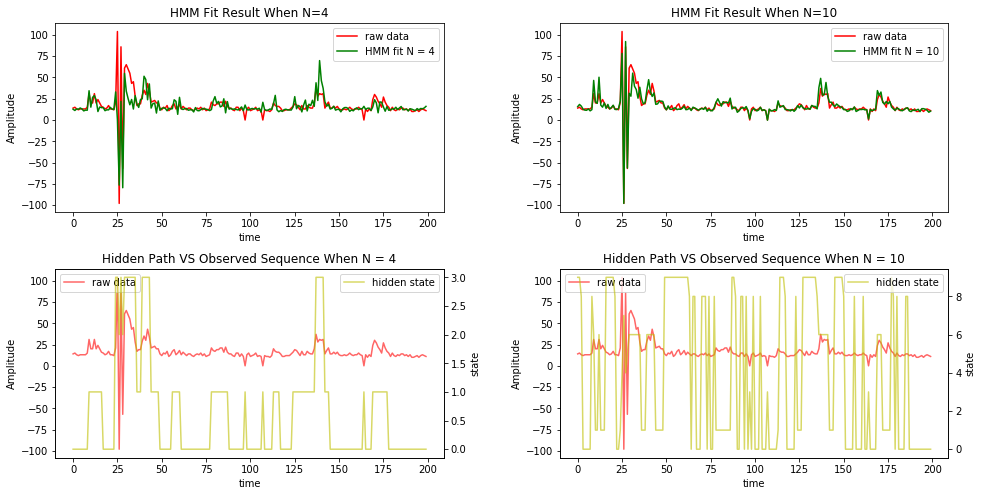

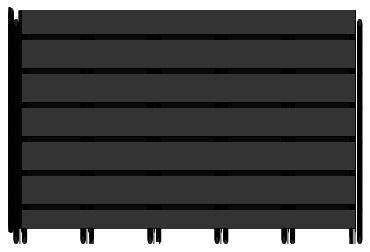

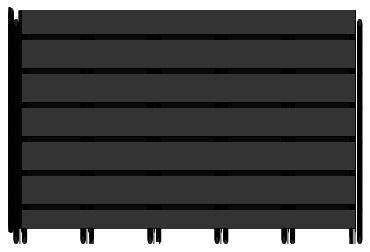

In [22]:
new_seq,new_state = model1.sample(1000)
n = 200
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
plt.subplots_adjust(hspace = 0.3,wspace = 0.3)
plt.subplot(221)
plt.plot(X[:n], color='r',label = 'raw data')
plt.plot(fit1[:n], color='g',label = 'HMM fit N = 4')
plt.legend()
plt.ylabel("Amplitude")
plt.xlabel("time")
plt.title("HMM Fit Result When N=4")
plt.subplot(222)
plt.plot(X[:n], color='r',label = 'raw data')
plt.plot(fit2[:n], color='g',label = 'HMM fit N = 10')
plt.legend()
plt.ylabel("Amplitude")
plt.xlabel("time")
plt.title("HMM Fit Result When N=10")
plt.subplots(224)
ax1 = axes[1,0]
ax2 = ax1.twinx()
ax1.plot(X[:n], 'r-',label = 'raw data',alpha=.6)
ax2.plot(hidden_states1[:n], 'y-',label = 'hidden state',alpha=.6)
ax2.legend(loc=1)
ax1.legend(loc=2)
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax2.set_ylabel('state')
ax1.set_title("Hidden Path VS Observed Sequence When N = 4")
plt.subplots(224)
ax1 = axes[1,1]
ax2 = ax1.twinx()
ax1.plot(X[:n], 'r-',label = 'raw data',alpha=.6)
ax2.plot(hidden_states2[:n], 'y-',label = 'hidden state',alpha=.6)
ax2.legend(loc=1)
ax1.legend(loc=2)
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax2.set_ylabel('state')
ax1.set_title("Hidden Path VS Observed Sequence When N = 10")
print('the fit score when n = 4 is :'+ str(r2_score(X[:n], fit1[:n])))
print('the fit score when n = 10 is :'+ str(r2_score(X[:n], fit2[:n])))

the predict score is :-0.0424826625154886


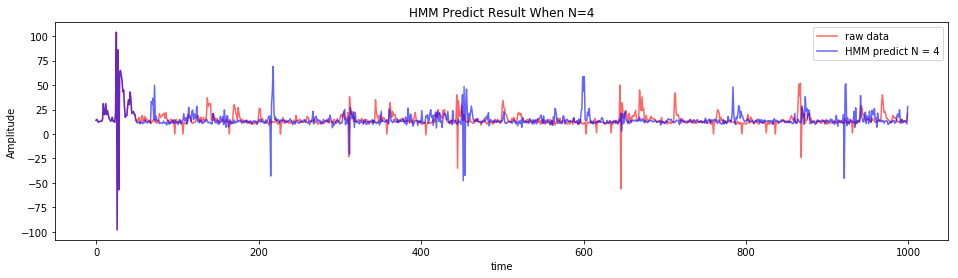

In [23]:
plt.figure(figsize=(16, 4))
n = 1000
plt.plot(X[:n], color='r',label = 'raw data',alpha=.6)
plt.plot(z[:n], color='b',label = 'HMM predict N = 4',alpha=.6)
plt.legend()
plt.ylabel("Amplitude")
plt.xlabel("time")
plt.title("HMM Predict Result When N=4")
print('the predict score is :'+ str(r2_score(X[:n], z[:n])))

In [24]:
train_acoustic_data_small = train['acoustic_data']
print(len(train_acoustic_data_small))

100000


In [25]:
original = np.column_stack([train_acoustic_data_small])
num_components = 4
model = hmm.GaussianHMM(n_components=num_components, covariance_type="diag", n_iter=1000)
model.fit(original)


GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=4, n_iter=1000, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

In [26]:
hidden_states = model.predict(original)
tmp = []
for x in hidden_states:
    tmp.append(model._generate_sample_from_state(x))
fit = np.array(tmp)

the fit score for original data is :0.21321109376210734
the fit score for down-sampled data is :0.3889384986247658


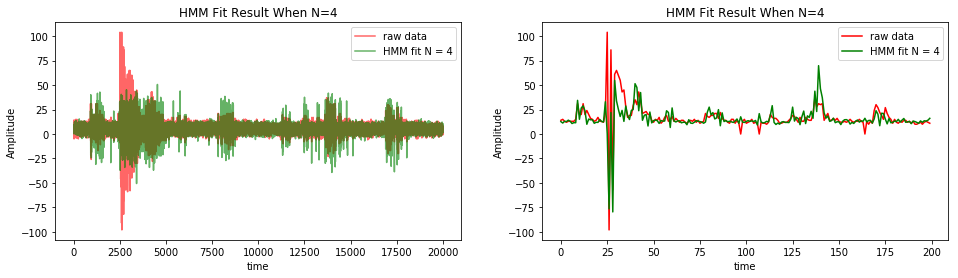

In [27]:
n= 20000
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plt.subplots_adjust(hspace = 0.3)
plt.subplot(121)
plt.plot(original[:n], color='r',label = 'raw data',alpha=.6)
plt.plot(fit[:n], color='g',label = 'HMM fit N = 4',alpha=.6)
plt.legend()
plt.ylabel("Amplitude")
plt.xlabel("time")
plt.title("HMM Fit Result When N=4")
plt.subplot(122)
plt.plot(X[:200], color='r',label = 'raw data')
plt.plot(fit1[:200], color='g',label = 'HMM fit N = 4')
plt.legend()
plt.ylabel("Amplitude")
plt.xlabel("time")
plt.title("HMM Fit Result When N=4")

print('the fit score for original data is :'+ str(r2_score(original[:n], fit[:n])))
print('the fit score for down-sampled data is :'+ str(r2_score(X[:n], fit1[:n])))

# Reconstruct a Gaussian HMM Model 
we tried to dig deeper to the GaussianHMM model code and reconstruct it based on hmmlearn to better understand this algorithm

In [13]:
import numpy as np
from math import pi,sqrt,exp,pow,log
from numpy.linalg import det, inv
from abc import ABCMeta, abstractmethod
from sklearn import cluster

class _BaseHMM():
    """
    reference: https://github.com/hmmlearn/hmmlearn
    n_state : numebr of state
    n_iter : time of iteration
    x_size : size of input
    start_prob : start probability
    transmat_prob : transitmition probability
    """
    __metaclass__ = ABCMeta  # referenced from hmmlearn

    def __init__(self, n_state=1, x_size=1, iter=20):
        self.n_state = n_state
        self.x_size = x_size
        self.start_prob = np.ones(n_state) * (1.0 / n_state)  
        self.transmat_prob = np.ones((n_state, n_state)) * (1.0 / n_state)  # transition matrix
        self.trained = False # if trained 
        self.n_iter = iter  # iteration time for EM algorithm

    @abstractmethod
    def _init(self,X):
        pass
    @abstractmethod
    def emit_prob(self, x):  # get the probability of X under Z P(X|Z)
        return np.array([0])


    @abstractmethod
    def generate_x(self, z): # generate sample x under state z p(x|z)
        return np.array([0])


    @abstractmethod
    def emit_prob_updated(self, X, post_state):
        pass


    def generate_seq(self, seq_length):
        X = np.zeros((seq_length, self.x_size))
        Z = np.zeros(seq_length)
        Z_pre = np.random.choice(self.n_state, 1, p=self.start_prob)  # sample the initial value
        X[0] = self.generate_x(Z_pre) # get the first value of a sequence
        Z[0] = Z_pre

        for i in range(seq_length):
            if i == 0: continue
            Z_next = np.random.choice(self.n_state, 1, p=self.transmat_prob[Z_pre,:][0])
            Z_pre = Z_next
            X[i] = self.generate_x(Z_pre)
            Z[i] = Z_pre

        return X,Z

    # estimiate the probabillity of X
    def X_prob(self, X, Z_seq=np.array([])):
        # if hiddent state is known, Z is the hidden state sequence
        X_length = len(X)
        if Z_seq.any():
            Z = np.zeros((X_length, self.n_state))
            for i in range(X_length):
                Z[i][int(Z_seq[i])] = 1
        else:
            Z = np.ones((X_length, self.n_state))
        
        _, c = self.forward(X, Z)  # P(x,z)
        
        prob_X = np.sum(np.log(c))  # P(X)
        return prob_X

    # predict next sample given current observed sequence
    def predict(self, X, x_next, Z_seq=np.array([]), istrain=True):
        if self.trained == False or istrain == False:  # if need to retrain the model based on current sequence
            self.train(X)

        X_length = len(X)
        if Z_seq.any():
            Z = np.zeros((X_length, self.n_state))
            for i in range(X_length):
                Z[i][int(Z_seq[i])] = 1
        else:
            Z = np.ones((X_length, self.n_state))
        # forward algorithm
        alpha, _ = self.forward(X, Z)  # P(x,z)
        prob_x_next = self.emit_prob(np.array([x_next]))*np.dot(alpha[X_length - 1],self.transmat_prob)
        return prob_x_next

    def decode(self, X, istrain=True):
        """
        vertib algorithm
        :param X: observed sequence
        :param istrain: is trained again baed on input sequence
        :return: hidden state sequence
        """
        if self.trained == False or istrain == False:
            self.train(X)

        X_length = len(X)  
        state = np.zeros(X_length) 

        pre_state = np.zeros((X_length, self.n_state))  # save the most probable previous sequence
        max_pro_state = np.zeros((X_length, self.n_state))  # save max probability state 

        _,c=self.forward(X,np.ones((X_length, self.n_state)))
        max_pro_state[0] = self.emit_prob(X[0]) * self.start_prob * (1/c[0]) # initial probability

        # forward
        for i in range(X_length):
            if i == 0: continue
            for k in range(self.n_state):
                prob_state = self.emit_prob(X[i])[k] * self.transmat_prob[:,k] * max_pro_state[i-1]
                max_pro_state[i][k] = np.max(prob_state)* (1/c[i])
                pre_state[i][k] = np.argmax(prob_state)

        # backward
        state[X_length - 1] = np.argmax(max_pro_state[X_length - 1,:])
        for i in reversed(range(X_length)):
            if i == X_length - 1: continue
            state[i] = pre_state[i + 1][int(state[i + 1])]

        return  state

    def expand_list(self, X):
        # transfer list to np.array
        C = []
        for i in range(len(X)):
            C += list(X[i])
        return np.array(C)


    def train(self, X, Z_seq=np.array([])):
        # X：array，
        # Z: array，hidden state
        self.trained = True
        X_length = len(X)
        self._init(X)

        # judge if the hidden state is known or not 
        if Z_seq.any():
            Z = np.zeros((X_length, self.n_state))
            for i in range(X_length):
                Z[i][int(Z_seq[i])] = 1
        else:
            Z = np.ones((X_length, self.n_state))

        for e in range(self.n_iter):  # EM algorithm
            print(e, " iter")
            # Expetection step
            
            alpha, c = self.forward(X, Z)  # P(x,z)
            beta = self.backward(X, Z, c)  # P(x|z)

            post_state = alpha * beta
            post_adj_state = np.zeros((self.n_state, self.n_state))  # adjacent posterior prob
            for i in range(X_length):
                if i == 0: continue
                if c[i]==0: continue
                post_adj_state += (1 / c[i])*np.outer(alpha[i - 1],beta[i]*self.emit_prob(X[i]))*self.transmat_prob

            # maximize
            self.start_prob = post_state[0] / np.sum(post_state[0])
            for k in range(self.n_state):
                self.transmat_prob[k] = post_adj_state[k] / np.sum(post_adj_state[k])

            self.emit_prob_updated(X, post_state)

    # forward algorithm
    def forward(self, X, Z):
        X_length = len(X)
        alpha = np.zeros((X_length, self.n_state))  # P(x,z)
        alpha[0] = self.emit_prob(X[0]) * self.start_prob * Z[0] # initia value
        # normalize
        c = np.zeros(X_length)
        c[0] = np.sum(alpha[0])
        alpha[0] = alpha[0] / c[0]
        # iteration
        for i in range(X_length):
            if i == 0: continue
            alpha[i] = self.emit_prob(X[i]) * np.dot(alpha[i - 1], self.transmat_prob) * Z[i]
            c[i] = np.sum(alpha[i])
            if c[i]==0: continue
            alpha[i] = alpha[i] / c[i]

        return alpha, c

    # backward algorithm
    def backward(self, X, Z, c):
        X_length = len(X)
        beta = np.zeros((X_length, self.n_state))  # P(x|z)
        beta[X_length - 1] = np.ones((self.n_state))
        # iteration
        for i in reversed(range(X_length)):
            if i == X_length - 1: continue
            beta[i] = np.dot(beta[i + 1] * self.emit_prob(X[i + 1]), self.transmat_prob.T) * Z[i]
            if c[i+1]==0: continue
            beta[i] = beta[i] / c[i + 1]

        return beta


def gauss2D(x, mean, cov):
    # x, mean, cov type is numpy<array>
    z = -np.dot(np.dot((x-mean).T,inv(cov)),(x-mean))/2.0
    temp = pow(sqrt(2.0*pi),len(x))*sqrt(det(cov))
    return (1.0/temp)*exp(z)

class GaussianHMM(_BaseHMM):
    """
    emit probability is guassian distributed
    """
    def __init__(self, n_state=1, x_size=1, iter=20):
        _BaseHMM.__init__(self, n_state=n_state, x_size=x_size, iter=iter)
        self.emit_means = np.zeros((n_state, x_size))      # mean of guassian
        self.emit_covars = np.zeros((n_state, x_size, x_size)) # covariance of gaussain
        for i in range(n_state): self.emit_covars[i] = np.eye(x_size)  # initialize as mean is 0, var is 1

    def _init(self,X):
        # get start value using Kmeans
        mean_kmeans = cluster.KMeans(n_clusters=self.n_state)
        mean_kmeans.fit(X)
        self.emit_means = mean_kmeans.cluster_centers_
        for i in range(self.n_state):
            self.emit_covars[i] = np.cov(X.T) + 0.01 * np.eye(len(X[0]))

    def emit_prob(self, x): # get emit prob of x under state k 
        prob = np.zeros((self.n_state))
        for i in range(self.n_state):
            prob[i]=gauss2D(x,self.emit_means[i],self.emit_covars[i])
        return prob

    def generate_x(self, z): # generate sample x based on z p(x|z)
        return np.random.multivariate_normal(self.emit_means[z][0],self.emit_covars[z][0],1)

    def emit_prob_updated(self, X, post_state): # update emit probability
        for k in range(self.n_state):
            for j in range(self.x_size):
                self.emit_means[k][j] = np.sum(post_state[:,k] *X[:,j]) / np.sum(post_state[:,k])

            X_cov = np.dot((X-self.emit_means[k]).T, (post_state[:,k]*(X-self.emit_means[k]).T).T)
            self.emit_covars[k] = X_cov / np.sum(post_state[:,k])
            if det(self.emit_covars[k]) == 0: # Singular matrix
                self.emit_covars[k] = self.emit_covars[k] + 0.01*np.eye(len(X[0]))




# Read the train file and use the our own GaussianHMM class to fit again

Here we use 20 iteration times to test our result

In [7]:
train_df = pd.read_csv('train.csv',nrows=100000, dtype={'acoustic_data': np.int16, 'time_to_failure': np.float32})
X = np.column_stack([train_df['acoustic_data'].iloc[:10000]])
y = np.column_stack([train_df['time_to_failure'].iloc[:10000]])
num_components = 4
model = model = GaussianHMM(4,1,20)
model.train(X)
hidden_states = model.decode(X)


0  iter
1  iter
2  iter
3  iter
4  iter
5  iter
6  iter
7  iter
8  iter
9  iter
10  iter
11  iter
12  iter
13  iter
14  iter
15  iter
16  iter
17  iter
18  iter
19  iter


In [17]:
model_real = hmm.GaussianHMM(n_components=4, covariance_type="diag", n_iter=20)
model_real.fit(X)
hidden_states_real = model_real.predict(X)

In [19]:
predict_value = []
for x in hidden_states_real:
    predict_value.append(model_real._generate_sample_from_state(x))

In [8]:
X_pre = np.zeros((10000,1))
j = 0
for i in hidden_states.astype(int):
    X_pre[j,:] = model.generate_x([i])
    j += 1

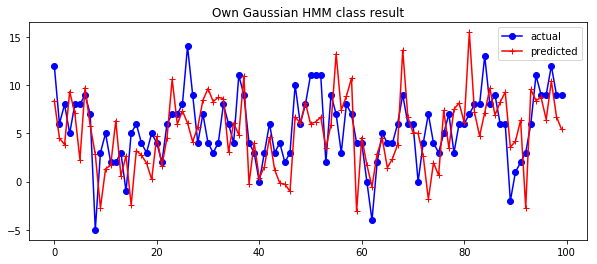

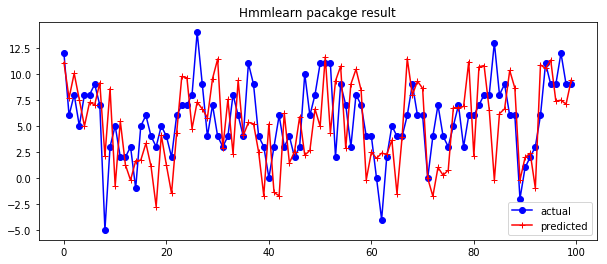

In [25]:
def plot_result(x1,x2,title):
    predict = x1#[0,:]
    actual_value = x2#[0,:]

    fig = plt.figure(figsize=(10,4))

    axes = fig.add_subplot(111)
    axes.plot(actual_value[:100], 'bo-', label="actual")
    axes.plot(predict[:100], 'r+-', label="predicted")
    axes.set_title(title)

    plt.legend()
    plt.show()
    
plot_result(X_pre[:1000],X[:1000],title = 'Own Gaussian HMM class result')
plot_result(predict_value[:1000],X[:1000],title = 'Hmmlearn pacakge result')
